# Simple Linear Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('height-weight.csv')


In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


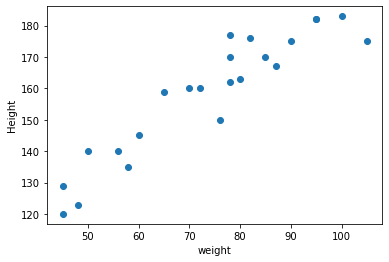

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("Height")
plt.show()

### Step:1 
    Devide feature into dependent and independent feature

In [13]:
x=df[['Weight']]
y=df['Height']

### Step:2 
    Train test split of the data set 

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### Step: 3 
    Stndedization of independent features 

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [19]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
x_train,x_test

(array([[ 1.73689094],
        [-0.92026952],
        [ 1.4542143 ],
        [ 0.21043706],
        [-1.48562281],
        [ 1.17153765],
        [-1.6552288 ],
        [-0.80719886],
        [-0.24184557],
        [ 0.0973664 ],
        [-1.37255215],
        [-1.03334018],
        [-0.12877492],
        [ 0.88886101],
        [ 0.43657837],
        [ 0.60618436],
        [ 0.71925502],
        [ 0.32350772]]),
 array([[ 0.21043706],
        [ 0.21043706],
        [-1.6552288 ],
        [ 1.17153765],
        [-0.52452222]]))

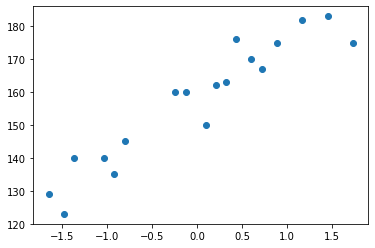

In [22]:
plt.scatter(x_train,y_train)

# Step 4 : train the model 

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regressor=LinearRegression()

In [26]:
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
regressor.coef_    # to calculate slope 

array([17.03440872])

In [29]:
regressor.intercept_   # to calculate intercept

157.5

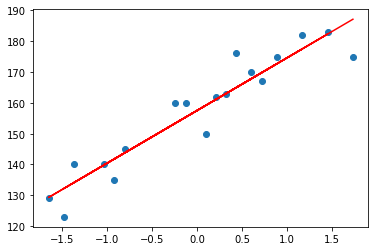

In [35]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')    # Best fit line 

In [36]:
y_pred_test=regressor.predict(x_test)

In [38]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

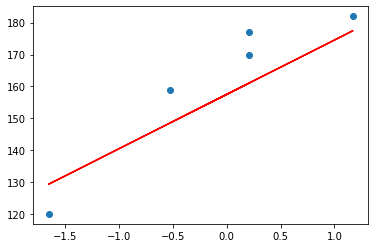

In [39]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'r')    # Best fit line

### cost function MSE,MAE,RMSE

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error 


In [41]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
RMSE=np.sqrt(mse)

In [42]:
print("Mean squared error is :",mse)
print("Mean absolute error is :",mae)
print("Root Mean squared error is :",RMSE
     )

Mean squared error is : 109.77592599051664
Mean absolute error is : 9.822657814519232
Root Mean squared error is : 10.477400726827081


# Performance metric  
R Squared

In [43]:
from sklearn.metrics import r2_score 


In [46]:
score=r2_score(y_test,y_pred_test)
print(round(score*100),'%')

78 %


Adjusted R Squared

In [56]:
Adj_r2=1- (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [57]:
print(round(Adj_r2*100),'%')

70 %


# Lets do new prediction 

In [62]:
new_weight=80
scaled_weight=scaler.transform([[new_weight]])
scaled_weight

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [66]:
predicted_height=regressor.predict(scaled_weight)

In [70]:
predicted_height

array([163.01076266])

### Assumptions

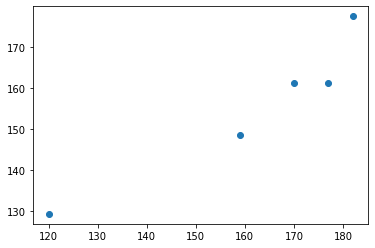

In [72]:
# 1. Scatter plot 
plt.scatter(y_test,y_pred_test)    # this should be linerly scatter for good prediction 

In [73]:
# 2 Reseduals should be Normally Distributed 
Residuals=y_test-y_pred_test

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

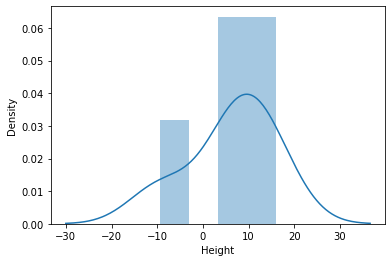

In [75]:
sns.distplot(Residuals,kde=True)

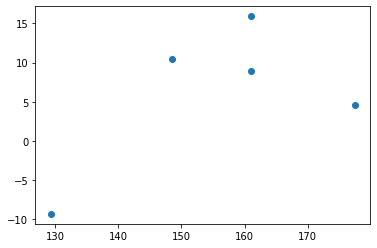

In [76]:
# Scatter plot between predited and residuals points should be uniformaly distributed
plt.scatter(y_pred_test,Residuals)

# Muplitple Liner Regression 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
from sklearn.datasets import fetch_california_housing 

In [9]:
california=fetch_california_housing()

In [10]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [11]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [12]:
california.target_names

['MedHouseVal']

In [13]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [14]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [15]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [16]:
df=pd.DataFrame(california.data,columns=california.feature_names)

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
df2=pd.DataFrame(california.target,columns=['Price'])

In [21]:
df2

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [23]:
df_final=pd.concat([df,df2],axis=1)

In [24]:
df_final.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [30]:
df_final.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [31]:
df_final.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [33]:
df_final.shape

(20640, 9)

<AxesSubplot:>

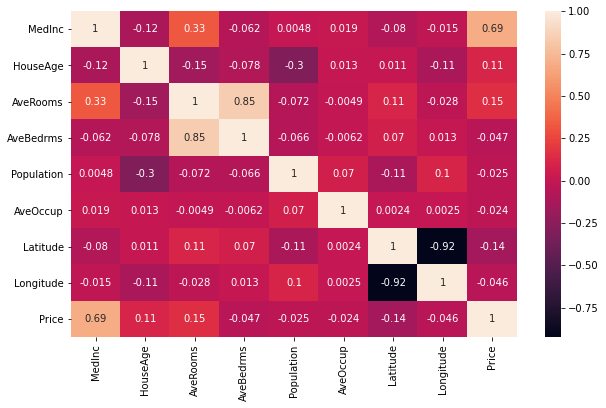

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(df_final.corr(),annot=True)

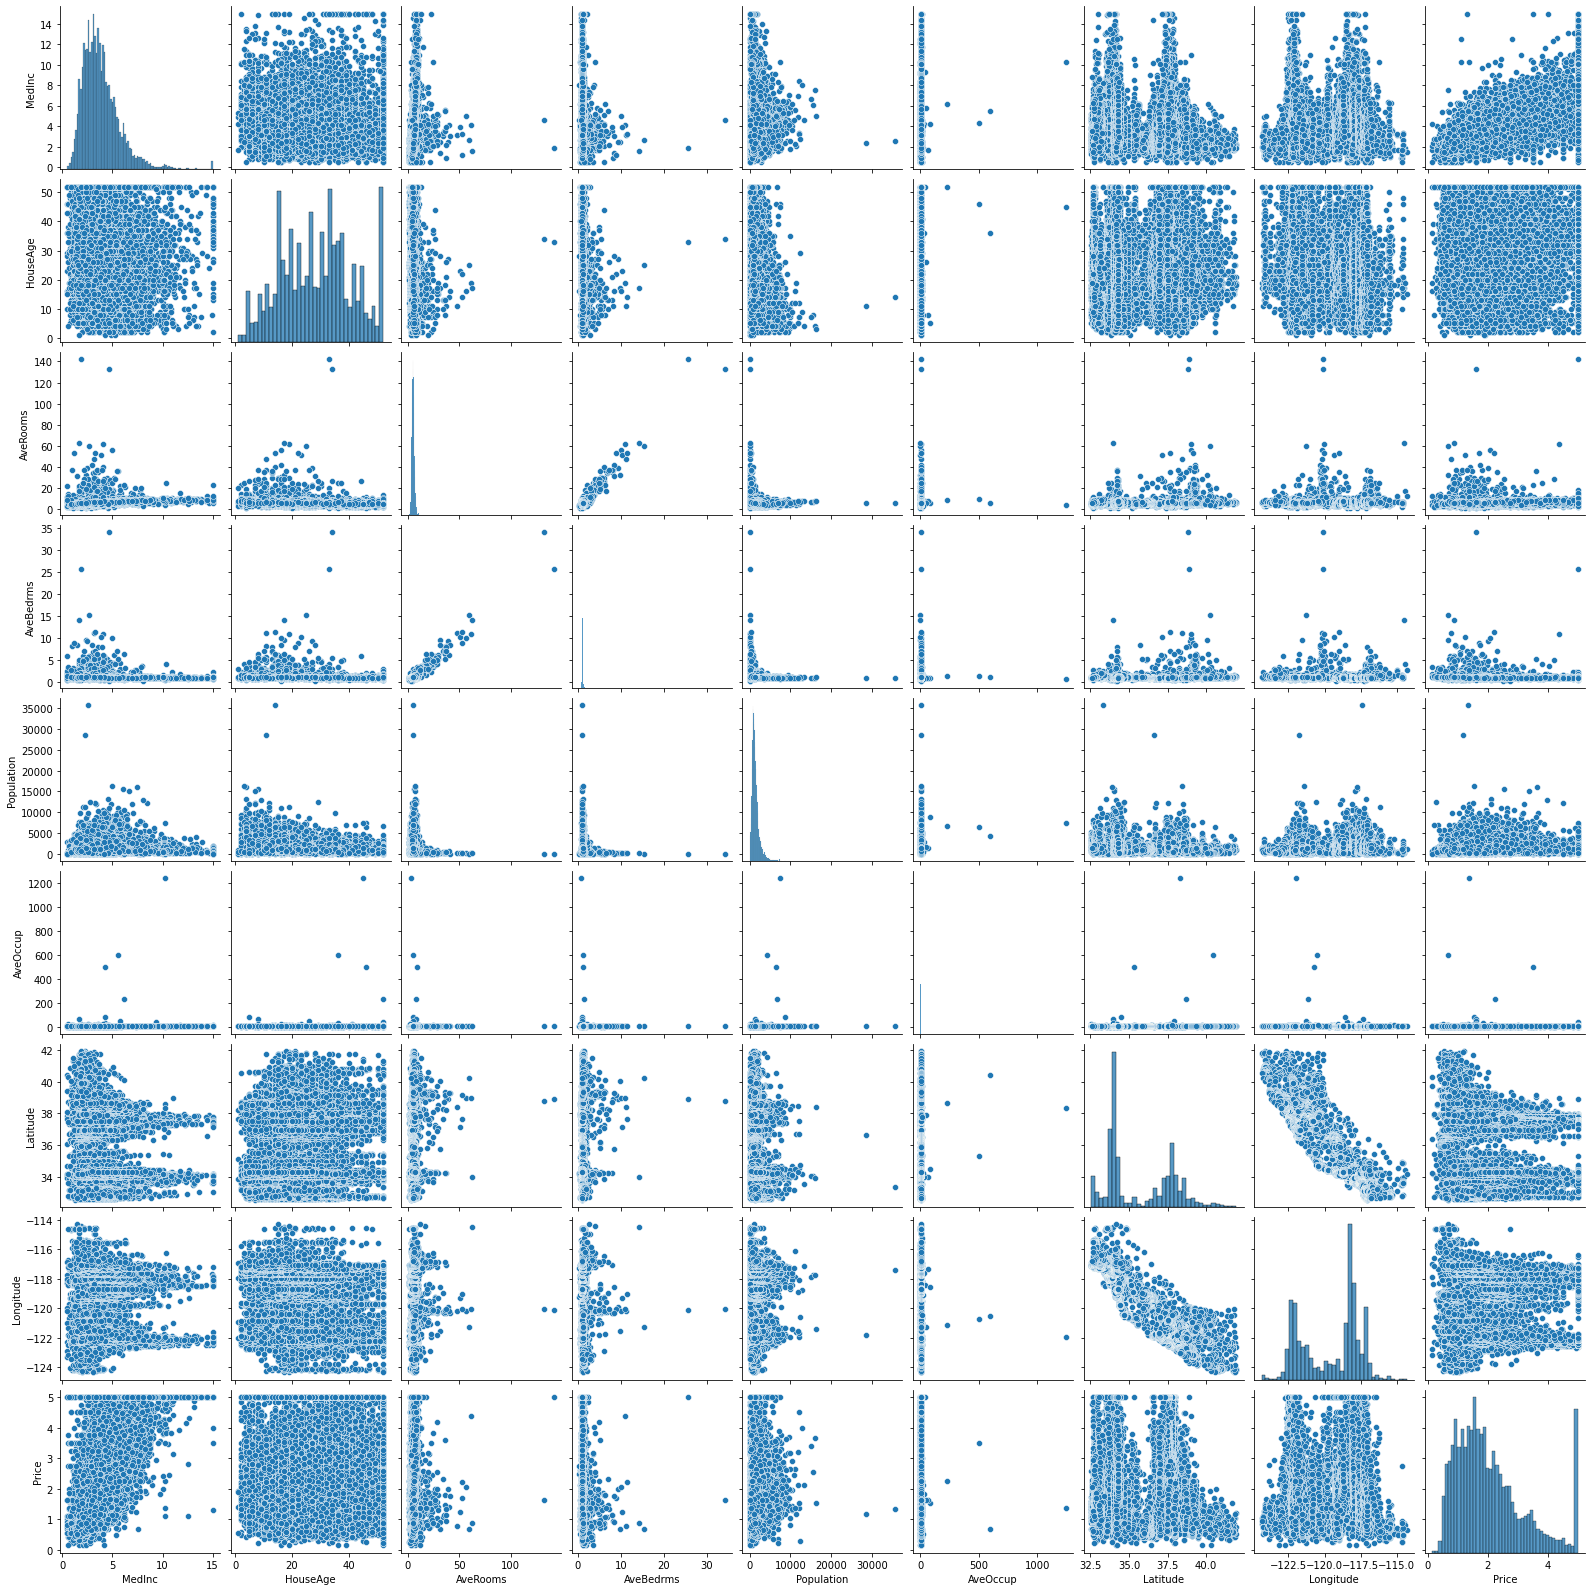

In [36]:
sns.pairplot(df_final)

In [52]:
## Independent and Dependent features
x=df_final.iloc[:,:-1] #independent features
y=df_final.iloc[:,-1] #dependent features

In [53]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=34)

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scale=StandardScaler()

In [62]:
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [63]:
x_train

array([[ 0.13224463,  0.42674742, -0.43750449, ..., -0.04259296,
        -1.132736  ,  1.17389791],
       [-0.4666696 , -0.84657709, -0.12560605, ..., -0.10774458,
         1.21140609, -1.51801087],
       [-0.16223864,  0.74507854, -0.10706146, ..., -0.02263323,
        -0.7264803 ,  1.08383405],
       ...,
       [ 0.65357738,  0.5063302 , -0.58761426, ..., -0.1624707 ,
        -0.95062137,  0.85367084],
       [ 5.85616777,  0.26758185,  0.97457893, ..., -0.11301122,
        -0.71247148,  0.5884828 ],
       [-0.55625147,  0.02883351, -0.44392275, ...,  0.12317351,
        -0.83855084,  0.78862472]])

In [64]:
x_test


array([[   3.0119    ,   22.        ,    3.77200903, ...,    2.26862302,
          34.15      , -118.12      ],
       [   3.9514    ,   27.        ,    5.01780415, ...,    2.57863501,
          36.75      , -119.72      ],
       [   5.5563    ,   13.        ,    6.72619048, ...,    2.87585034,
          33.94      , -117.34      ],
       ...,
       [   8.4704    ,   52.        ,    7.01234568, ...,    2.76131687,
          37.58      , -122.38      ],
       [   7.4046    ,   47.        ,    7.03134796, ...,    2.85579937,
          34.18      , -118.28      ],
       [   5.2662    ,   16.        ,    5.86933798, ...,    3.08362369,
          37.31      , -120.44      ]])

# Model training 

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
Regresssor=LinearRegression()

In [78]:
Regresssor.fit(x_train,y_train)

LinearRegression()

In [79]:
Regresssor.coef_

array([ 0.82008265,  0.11737941, -0.2644784 ,  0.30486713,  0.00108314,
       -0.02812237, -0.90022595, -0.86679403])

In [80]:
Regresssor.intercept_

2.0687362142030663

In [81]:
y_pred=Regresssor.predict(x_test)

In [82]:
#Performance metrics 
from sklearn.metrics import r2_score

In [85]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-4573.174190411004


In [87]:
#adjusted R2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

-4578.553198719587

In [89]:
#cost function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

6159.416983594201
78.45466227207653
78.48195323508584


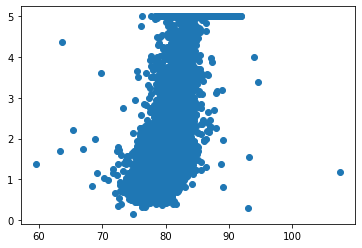

In [91]:
# Assumption 
plt.scatter(y_pred,y_test)
# not correlated 

In [92]:
Reseduals=y_pred-y_test

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

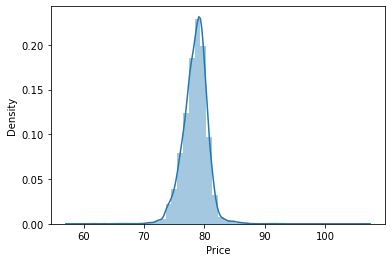

In [110]:
sns.distplot(Reseduals,kde=True)

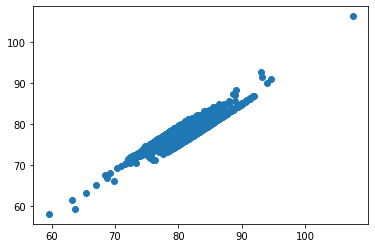

In [98]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(y_pred,Reseduals)

# Pickling
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [99]:
import pickle
pickle.dump(Regresssor,open('regressor.pkl','wb'))

In [100]:
model=pickle.load(open('regressor.pkl','rb'))

In [101]:
model.predict(x_test)

array([79.12155596, 78.96447378, 81.42039908, ..., 86.4447125 ,
       84.78339687, 79.63545345])

In [106]:
val=[4,3,7,8,9,2,5,6]
scaled_val=scale.transform([val])


In [107]:
model.predict(scaled_val)

array([-3.45959711])

# Ridge Lasso and Elastic Net 

In [113]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
%matplotlib inline 

In [117]:
dataset=pd.read_csv('Aggerian_data.csv',header=1)

In [118]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [120]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [123]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [124]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [130]:
dataset['Region']=dataset['Region'].astype(int)

In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [135]:
df=dataset.dropna().reset_index(drop = True)

In [136]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [141]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [142]:
df=df.drop(122).reset_index(drop=True)

In [143]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [146]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [147]:
df.columns=df.columns.str.strip()

In [148]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [151]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [153]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [155]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [156]:
df.to_csv('Aggeterian_cleaned_data.csv',index=False)

# EDA

In [159]:
df_copy=df.drop(['day', 'month', 'year'],axis=1)

In [160]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [161]:
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [162]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [165]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

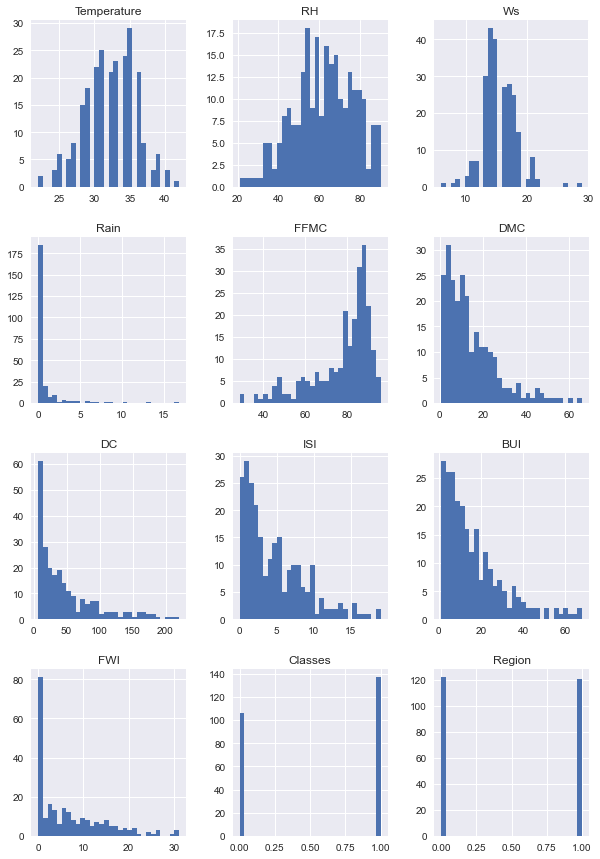

In [172]:
# making histplot for all the features
plt.style.use('seaborn')
df_copy.hist(bins=30,figsize=(10,15))
plt.show()

In [174]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<AxesSubplot:>

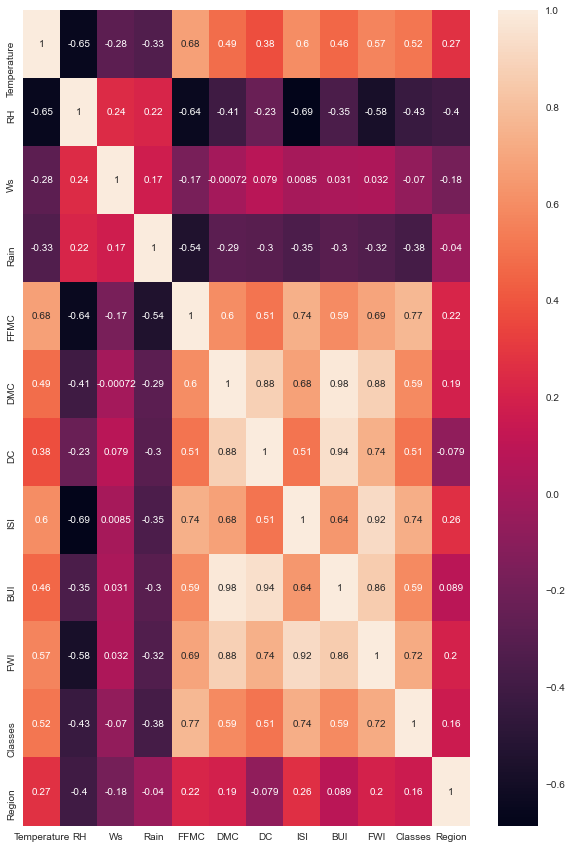

In [179]:
plt.figure(figsize=(10,15))
sns.heatmap(df_copy.corr(),annot=True)

C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

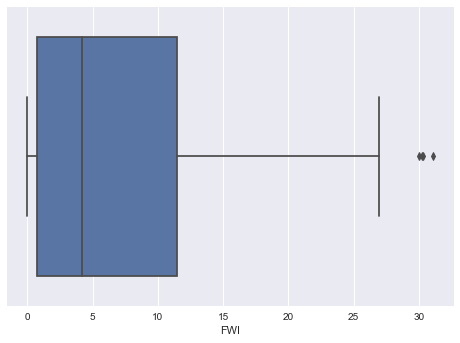

In [180]:
sns.boxplot(df_copy['FWI'],orient='h')

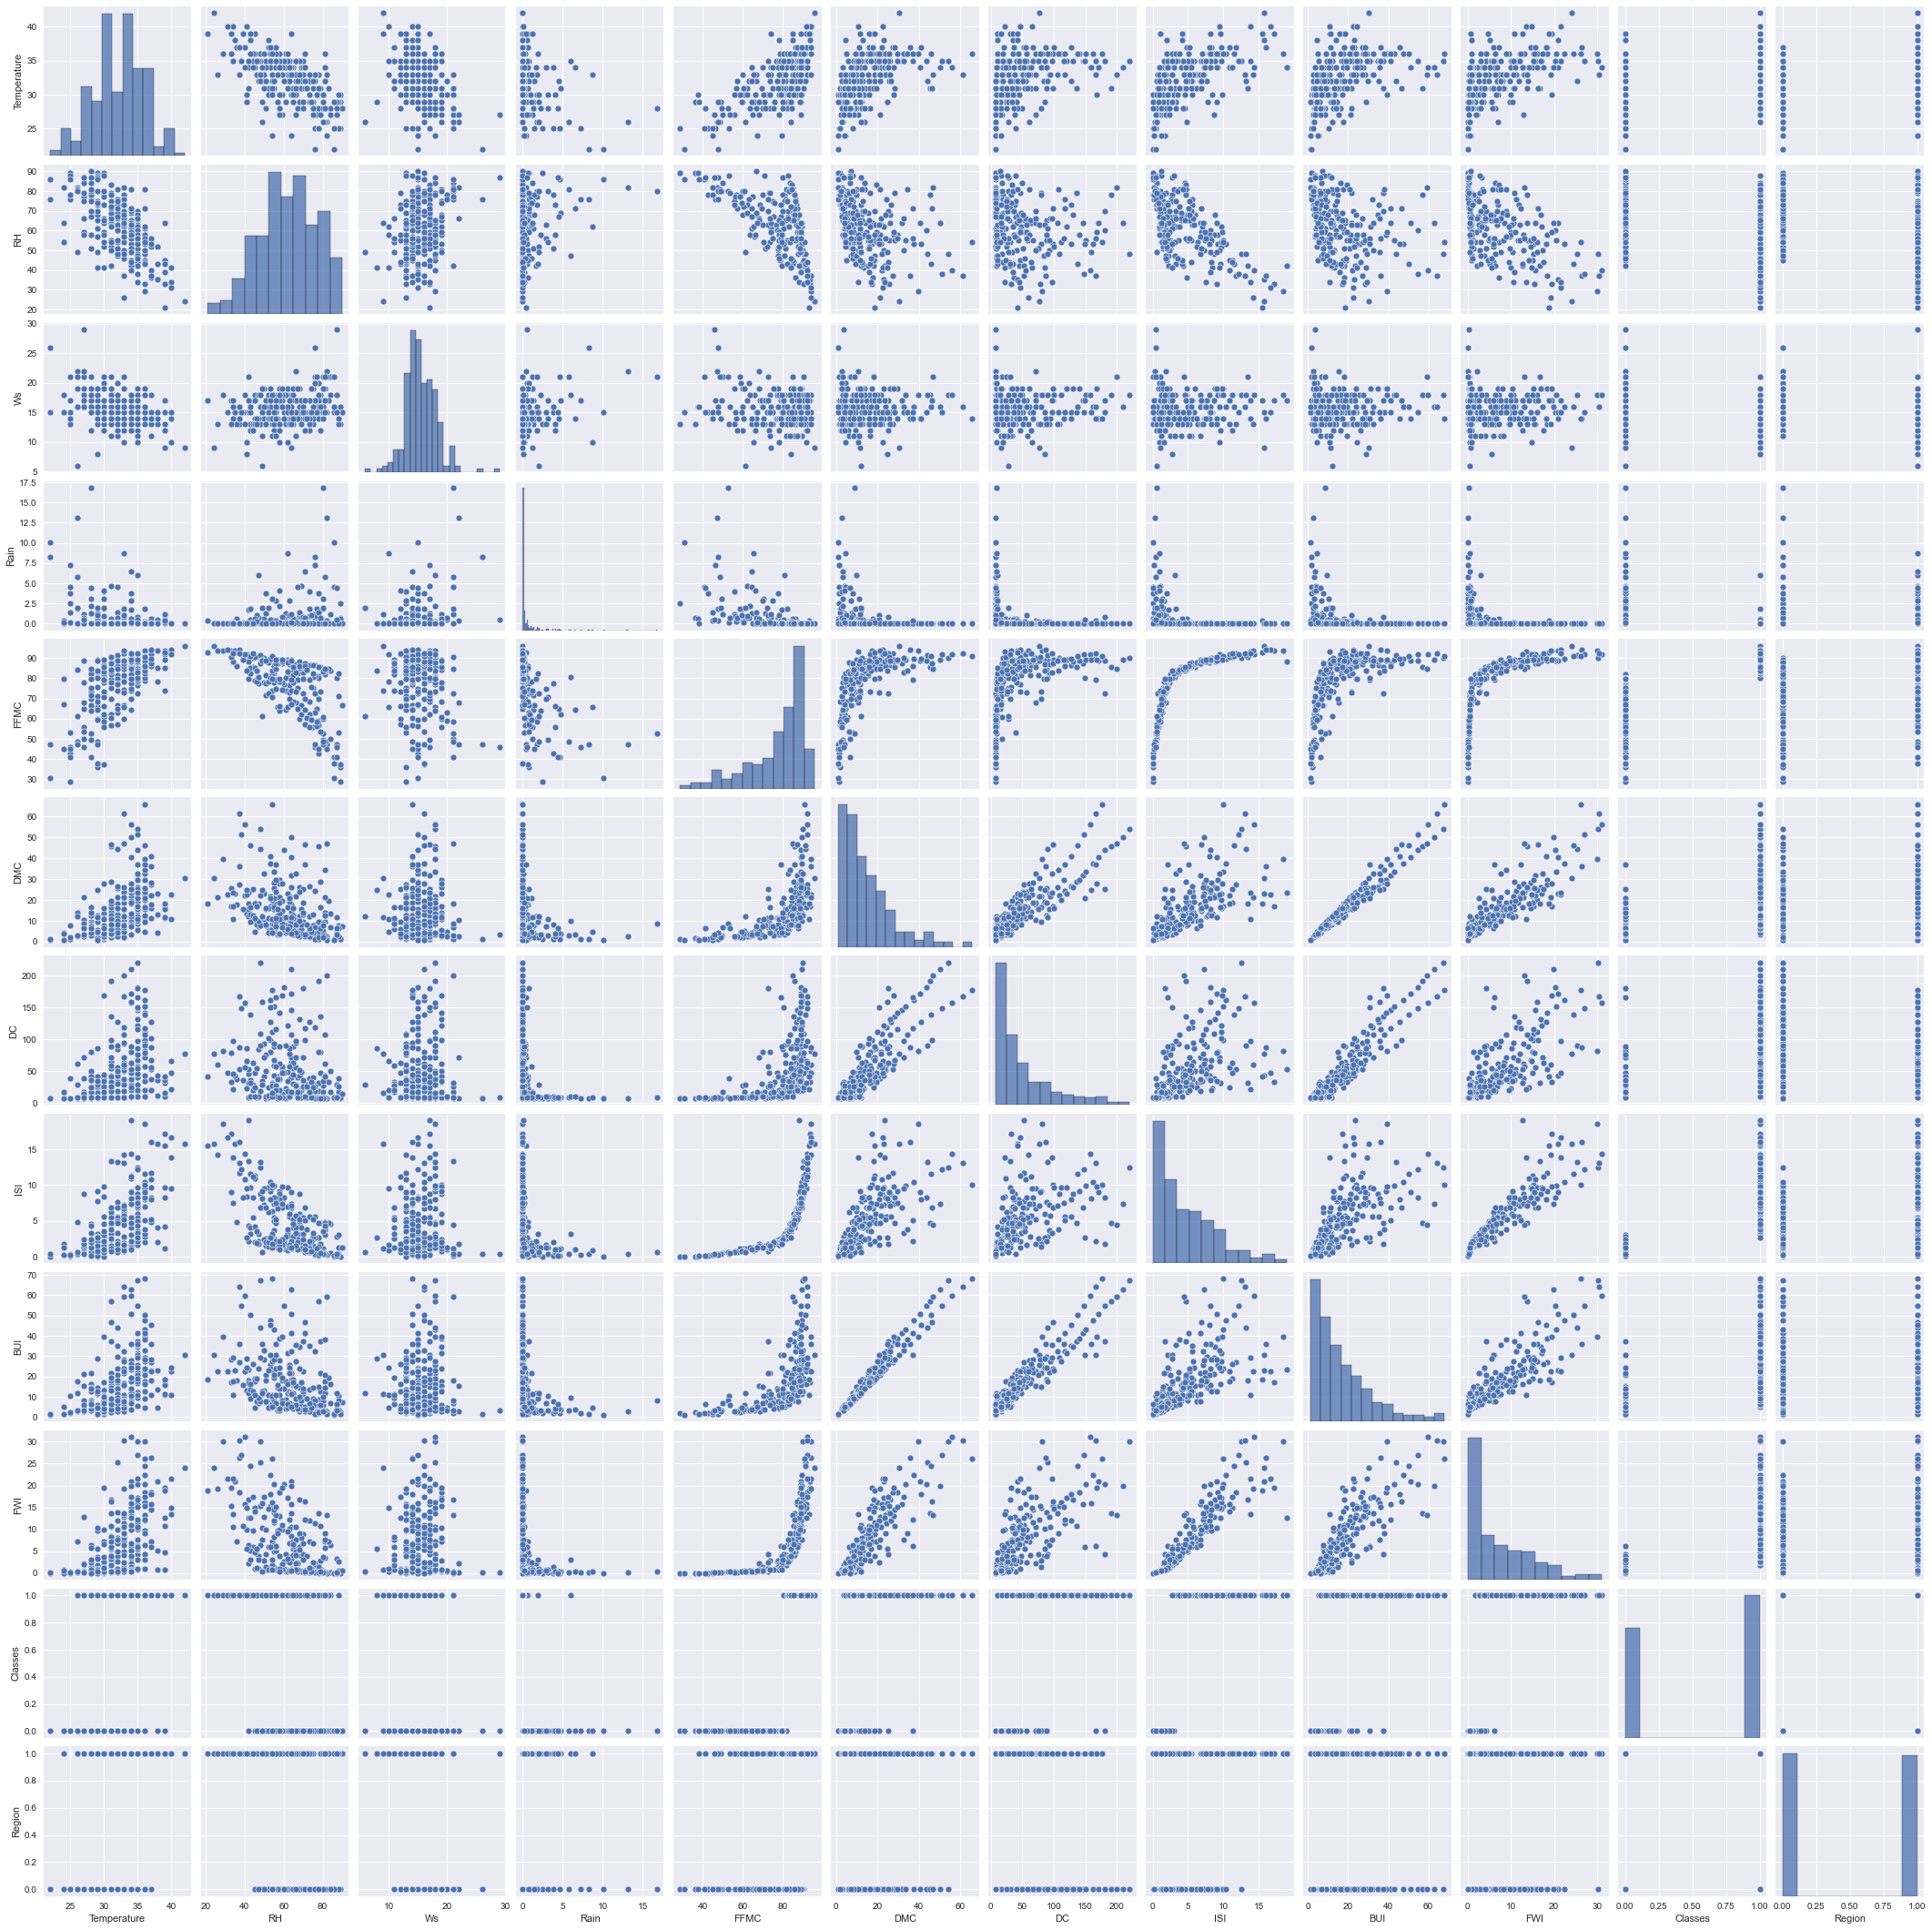

In [181]:
sns.pairplot(df_copy)

In [182]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

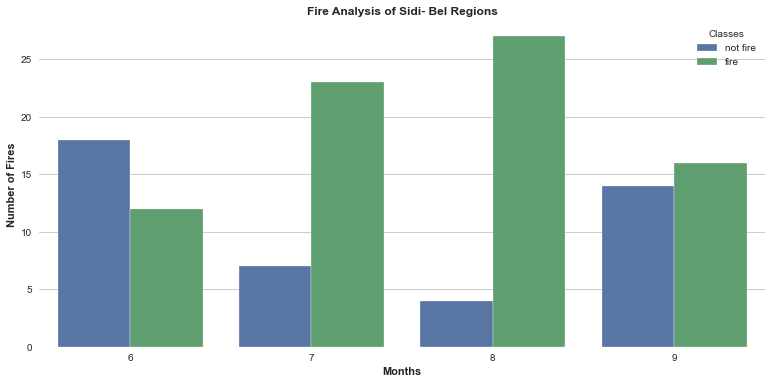

In [186]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

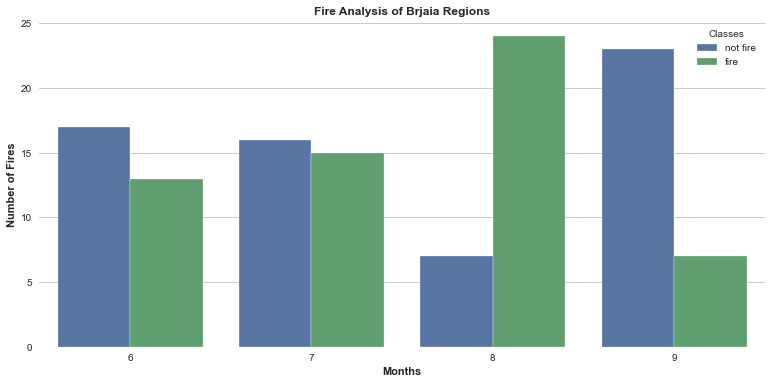

In [185]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

<AxesSubplot:xlabel='month', ylabel='count'>

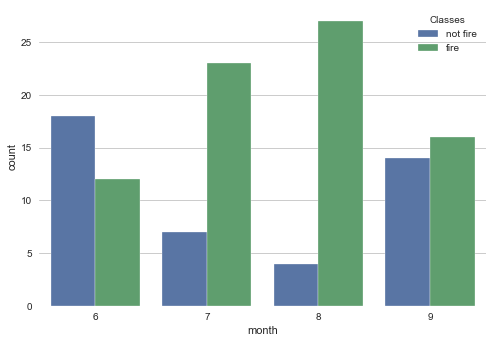

In [188]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


# Model Training and Predictions 

In [190]:
x=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [191]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [193]:
[y]

[0      0.5
 1      0.4
 2      0.1
 3      0.0
 4      0.5
       ... 
 238    6.5
 239    0.0
 240    0.2
 241    0.7
 242    0.5
 Name: FWI, Length: 243, dtype: float64]

In [194]:
from sklearn.model_selection import train_test_split 

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=67)

In [196]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((170, 11), (73, 11), (170,), (73,))

In [197]:
# Feature selection using multicolinearuty 
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.598490,-0.222245,-0.316681,0.662367,0.487773,0.351695,0.592501,0.452367,0.480380,0.244728
RH,-0.598490,1.000000,0.168358,0.216029,-0.607109,-0.377368,-0.164568,-0.694449,-0.310545,-0.377600,-0.413794
Ws,-0.222245,0.168358,1.000000,0.156626,-0.065107,0.050869,0.152961,0.059150,0.089944,-0.034171,-0.212054
Rain,-0.316681,0.216029,0.156626,1.000000,-0.565304,-0.280856,-0.299753,-0.347008,-0.291472,-0.389513,-0.028830
FFMC,0.662367,-0.607109,-0.065107,-0.565304,1.000000,0.590442,0.493617,0.729720,0.572770,0.765479,0.184477
DMC,0.487773,-0.377368,0.050869,-0.280856,0.590442,1.000000,0.882953,0.675389,0.984656,0.589099,0.162983
DC,0.351695,-0.164568,0.152961,-0.299753,0.493617,0.882953,1.000000,0.503592,0.949562,0.519817,-0.126333
ISI,0.592501,-0.694449,0.059150,-0.347008,0.729720,0.675389,0.503592,1.000000,0.630328,0.715728,0.265713
BUI,0.452367,-0.310545,0.089944,-0.291472,0.572770,0.984656,0.949562,0.630328,1.000000,0.581921,0.060178
Classes,0.480380,-0.377600,-0.034171,-0.389513,0.765479,0.589099,0.519817,0.715728,0.581921,1.000000,0.124148


<AxesSubplot:>

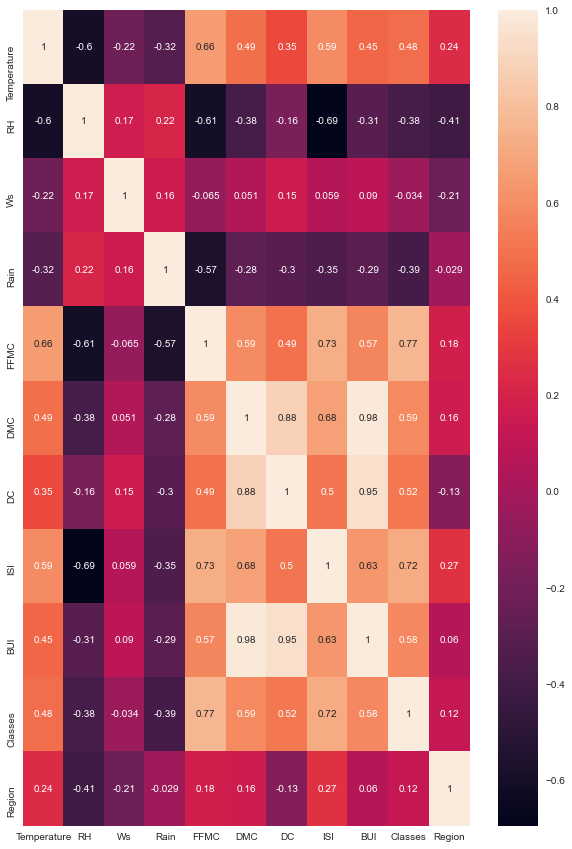

In [198]:
plt.figure(figsize=(10,15))
sns.heatmap(x_train.corr(),annot=True)

In [205]:
def correlation_selection(dataset,threshold):
    corre_features=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>=threshold:
                corre_features.add(corr_matrix.columns[i])
    return corre_features 


                

In [206]:
corr_features=correlation_selection(x_train,0.85)

In [207]:
corr_features

{'BUI', 'DC'}

In [208]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [209]:
x_train.shape

(170, 9)

In [210]:
x_test.shape


(73, 9)

# Feature Scaling using z-score 

In [211]:
from sklearn.preprocessing import StandardScaler

In [212]:
scaled=StandardScaler()

In [213]:
x_train=scaled.fit_transform(x_train)
x_test=scaled.transform(x_test)

In [214]:
x_train

array([[-1.65315373,  1.27343175,  1.32712187, ..., -0.01164718,
         0.86751214, -1.04822013],
       [ 0.2642468 , -0.3491796 ,  0.19906828, ...,  0.43094572,
         0.86751214,  0.95399809],
       [-0.00966757, -0.48439721, -0.55296744, ...,  0.03494155,
         0.86751214,  0.95399809],
       ...,
       [ 1.08598988,  0.59734369, -0.17694958, ...,  0.05823591,
         0.86751214,  0.95399809],
       [-1.10532501,  1.07060533,  0.19906828, ..., -0.80365554,
        -1.15272162, -1.04822013],
       [-0.00966757,  0.46212607,  0.19906828, ...,  0.15141336,
         0.86751214, -1.04822013]])

In [215]:
x_test

array([[-1.10532501e+00,  1.47625816e+00,  9.51104004e-01,
        -3.87169373e-01,  4.01928685e-01, -1.14805100e-01,
        -8.15302722e-02,  8.67512144e-01, -1.04822013e+00],
       [-2.83581926e-01,  1.24082044e-01, -1.76949582e-01,
        -3.87169373e-01,  6.06756927e-01, -6.06774976e-02,
         1.98002090e-01,  8.67512144e-01, -1.04822013e+00],
       [-1.10532501e+00,  3.26908462e-01,  1.32712187e+00,
        -3.87169373e-01, -1.91366914e-01, -9.34451657e-01,
        -6.63889359e-01, -1.15272162e+00,  9.53998092e-01],
       [-2.83581926e-01,  1.24082044e-01,  9.51104004e-01,
        -3.87169373e-01,  6.13819970e-01,  2.17693031e-01,
         4.30945724e-01,  8.67512144e-01, -1.04822013e+00],
       [ 8.12075517e-01, -1.36331169e+00, -1.76949582e-01,
        -2.33027000e-01,  4.65496070e-01,  3.98451933e-02,
        -1.28118999e-01,  8.67512144e-01,  9.53998092e-01],
       [-9.66756567e-03, -8.90050046e-01, -1.68102103e+00,
        -3.87169373e-01,  7.97459084e-01, -4.009081

<AxesSubplot:>

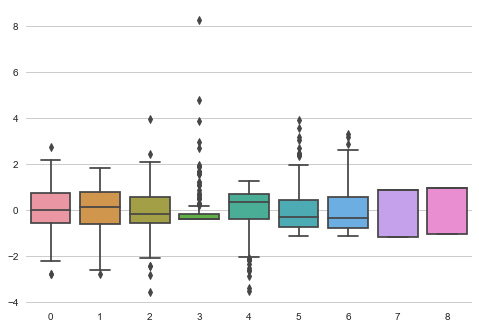

In [217]:
sns.boxplot(data=x_train)

# Liner regression Model

MSE is  0.8330958839869789
Accuracy is  98.19053175919007


C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

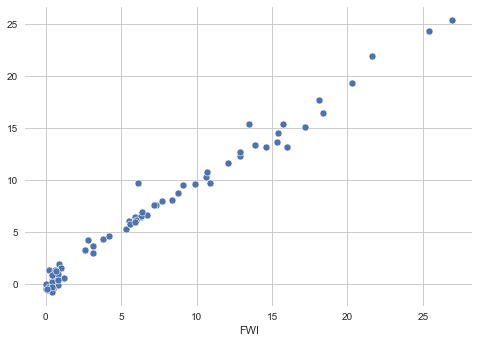

In [225]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MSE is ",mse)
print("Accuracy is ",score*100)
sns.scatterplot(y_test,y_pred)

# Lasso Regression 

MSE is  2.5011441550913824
Accuracy is  94.56756298846867


C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

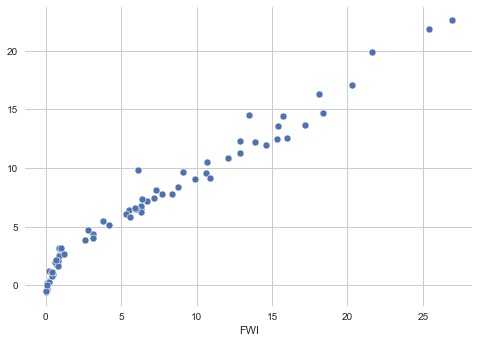

In [227]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
lasso_Reg=Lasso()
lasso_Reg.fit(x_train,y_train)
y_pred_lasso=lasso_Reg.predict(x_test)
mse=mean_squared_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
print("MSE is ",mse)
print("Accuracy is ",score*100)
sns.scatterplot(y_test,y_pred_lasso)

MSE is  0.9929567314228186
Accuracy is  97.84331707244863


C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

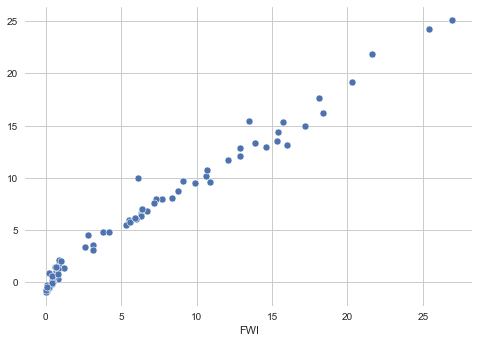

In [229]:
# Cross Validtion using Lasso CV 
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(x_train,y_train)
y_pred_lassocv=lasso_cv.predict(x_test)
mse=mean_squared_error(y_test,y_pred_lassocv)
score=r2_score(y_test,y_pred_lassocv)
print("MSE is ",mse)
print("Accuracy is ",score*100)
sns.scatterplot(y_test,y_pred_lassocv)

# Ridge Regression 

MSE is  0.8600889525214367
Accuracy is  98.13190333337026


C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

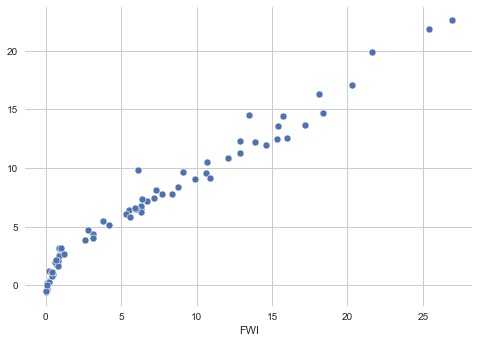

In [230]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
Ridge_Reg=Ridge()
Ridge_Reg.fit(x_train,y_train)
y_pred_Ridge=Ridge_Reg.predict(x_test)
mse=mean_squared_error(y_test,y_pred_Ridge)
score=r2_score(y_test,y_pred_Ridge)
print("MSE is ",mse)
print("Accuracy is ",score*100)
sns.scatterplot(y_test,y_pred_lasso)

# Cross Validation Using Ridge

MSE is:  1.2035902346209078
Accuracy is:  97.38582515367516


C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

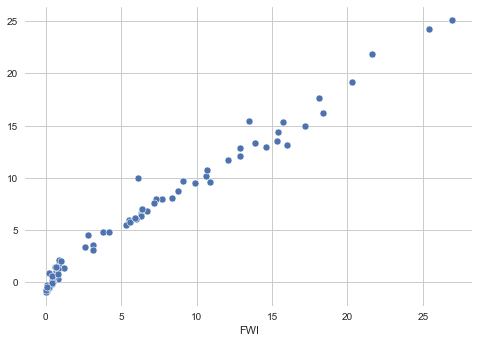

In [232]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
Ridge_cv=RidgeCV(cv=5)
Ridge_cv.fit(x_train,y_train)
y_pred_Ridgecv=Ridge_cv.predict(x_test)
mse=mean_squared_error(y_test,y_pred_Ridgecv)
score=r2_score(y_test,y_pred_Ridgecv)
print("MSE is: ",mse)
print("Accuracy is: ",score*100)
sns.scatterplot(y_test,y_pred_lassocv)

# ElasticNet Regression

MSE is  5.044107241890613
Accuracy is  89.04429606138449


C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

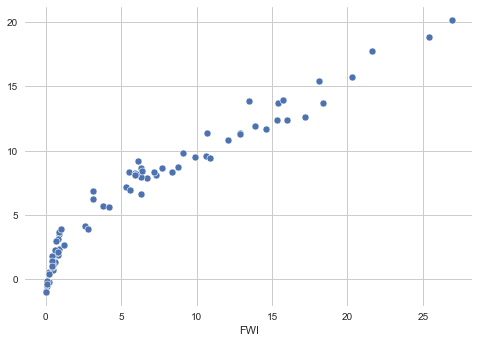

In [233]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
ElasticNet_reg=ElasticNet()
ElasticNet_reg.fit(x_train,y_train)
y_pred_ela=ElasticNet_reg.predict(x_test)
mse=mean_squared_error(y_test,y_pred_ela)
score=r2_score(y_test,y_pred_ela)
print("MSE is ",mse)
print("Accuracy is ",score*100)
sns.scatterplot(y_test,y_pred_ela)

# Cross validation using elastic net 

MSE is:  0.9204442462778509
Accuracy is:  98.00081279587495


C:\Users\chintan Gehlot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

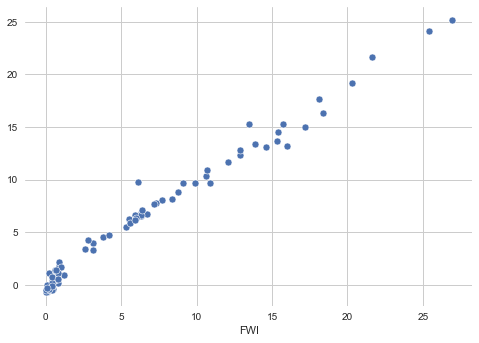

In [234]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
ElasticNet_cv=ElasticNetCV(cv=5)
ElasticNet_cv.fit(x_train,y_train)
y_pred_elscv=ElasticNet_cv.predict(x_test)
mse=mean_squared_error(y_test,y_pred_elscv)
score=r2_score(y_test,y_pred_elscv)
print("MSE is: ",mse)
print("Accuracy is: ",score*100)
sns.scatterplot(y_test,y_pred_elscv)

In [235]:
import pickle 

In [239]:
pickle.dump(scaled,open('scaled.pkl','wb'))
pickle.dump(Ridge_Reg,open('ridge.pkl','wb'))